In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Testing means (with 1 sample)

In [2]:
# here I generate fake data to have slighly fat squirrels

np.random.seed(42)

r1 = stats.expon.rvs(size=500, loc = 0.15, scale = 3 )
r2 = stats.norm.rvs(size=500,loc=2,scale = 0.45)
pop = pd.Series(np.concatenate([r1,r2]))
samp_size = 80 # 80 > 30 -> Normal distribution.
pop

0      1.557804
1      9.180364
2      4.100237
3      2.888828
4      0.658875
         ...   
995    1.761109
996    1.779752
997    2.469872
998    2.306851
999    2.831018
Length: 1000, dtype: float64

<Axes: >

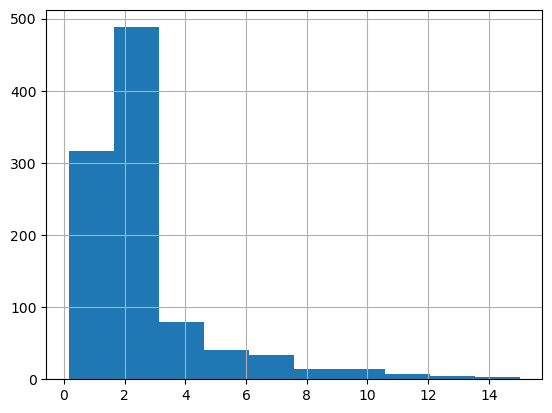

In [3]:
pop.hist()

<Axes: >

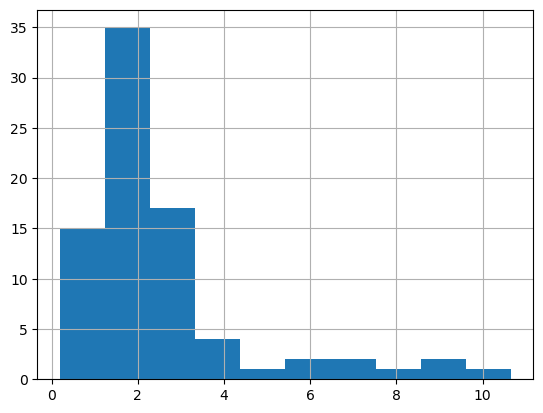

In [4]:
squirrels = pop.sample(samp_size)
squirrels.hist()

<Axes: >

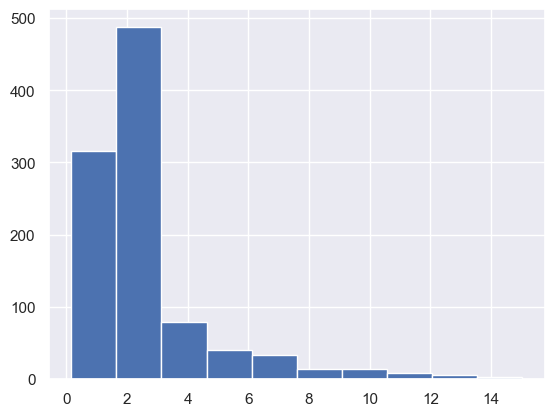

In [5]:
sns.set_theme()
pop.hist()

In [6]:

# The mean of our sample, however, is:
squirrels_mean = squirrels.mean()
print("Sample mean of squirrels: {:.2f}".format(squirrels_mean))

Sample mean of squirrels: 2.50


In [7]:
# Let's compute the standard error:
sem = np.std(pop)/np.sqrt(samp_size)
sem

0.24236539064525733

### Problem statement

Zoological registers say that squirrels weigh on average 2kg <br>
However the sample we took has a mean of 2.5kg
Are squirrels obese? :(

- H0: mu <= 2
- H1: mu> 2

### Or in other words:

Is the mean of our sample different than 2kg due to chance, or because the population of squirrels from where the sample comes has, in fact, a different mean than 2kg?

In [8]:
#Remember:

# The Central Limit Theorem tells us that no matter the true underlying distribution of the population,
# if we take multiple samples of a fixed size and we plot the means of these samples, they will form a 
# normal distribution centered around the population mean. 
# This distribution is called the "Sample distribution of the sample means".

# The "Sample distribution of the sample mean" has these 3 properties:
    # 1) its mean is equal to the mean of the population (we're assuming it's 2kg)
    # 2) its standard deviation is equal to the standard error of our estimate (we computed it above as 'sem')
    # 3) it resembles a normal distribution.

Our sample size is bigger than 30, therefore our sample distribution will follow a normal distribution (otherwise it will follow a t-student distribution). 

Let's find the z score for our sample. The z score is the number of standard deviations that a number is away from the mean of a distribution.

<b>  z distribution is a standard normal distribution 

In [9]:
z = (squirrels_mean-2)/sem
print("The z score of our sample is: {:.2f}".format(z))

The z score of our sample is: 2.08


Let's fix our confidence level to 95% which is the same as saying $\alpha = 1 - 0.95 = 0.05$

Now we need to find out for which value on the x axis of a **normal distribution** we get 0.95 of the total area.

In [10]:
zc = stats.norm.ppf(1-0.05) # 0.95 is the confidence level.
print("The critical value corresponding to a 0.95 area of a normal distribution is: {:.2f}".format(zc))

The critical value corresponding to a 0.95 area of a normal distribution is: 1.64


Using a higher confindence level. Set it to 98%.

In [11]:
zc = stats.norm.ppf(0.98)
print("The critical value corresponding to a 0.95 area of a normal distribution is: {:.2f}".format(zc))

The critical value corresponding to a 0.95 area of a normal distribution is: 2.05


Set the confidence level to 0.999

In [12]:
zc = stats.norm.ppf(0.999)
print("The critical value corresponding to a 0.95 area of a normal distribution is: {:.2f}".format(zc))

The critical value corresponding to a 0.95 area of a normal distribution is: 3.09


Let's compare our z-score with the critical value:zc. Are we in the forbiden region?

z = 2.08 > zc = 1.64

-> We reject the null hypothesis. 
Squirrels have an obesity

# Example:

45 Ironhack students took a Qualified assessment and their score was 130. The average score is 100 with a standard deviation of 10. Test whether or not Ironhack students are different from the regular population.

In [13]:
n = 45 # 45 > 30 -> Normal distribution
# Ho: \mu = 100
# Ha: mean != 100

sample_mean = 130
pop_mean = 100
pop_std_dev = 10

In [14]:
z = ( sample_mean - pop_mean ) / ( pop_std_dev / np.sqrt(45) )
print("Our z score is: {:.2f}".format(z))

Our z score is: 20.12


Let's set the confidence level to 95% = 0.95

Two sided: Ha: $\mu \neq 100$

In [21]:
zc = stats.norm.ppf(1-(0.05/2))
print("Our zc score is: {:.2f}".format(zc))

Our zc score is: 1.96


<b>conclusion: we reject the null hypothesis.  average score differs from 100 

In [19]:
p_value = stats.t.sf(np.abs(tc), 79)

In [20]:
p_value

0.02676313612819717